#Semana 8 Estadística Inferencial 3 Regresión Logística

## Cargue, descripción y análisis exploratorio del dataset

In [ ]:
#Se importan las librerías clásicas:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pty
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.special import expit

from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,f1_score, classification_report)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay


# se debe instalar solo una vez
#pip install pandas-profiling

In [ ]:
# importamos el dataset
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Ruta="/content/drive/MyDrive/Colab Notebooks/Especialización IA Uniminuto/1 - Fundamentos para IA/Semana 8/breast-cancer-wisconsin.data"

# Establecemos los headers de los features, dado que la data viene sin ellos:
list_columns = ['id number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                 'Marginal Adhesion' , 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                 'Normal Nucleoli', 'Mitoses', 'Class']
#Importamos los archivos contenidos en el folder y chequeamos los datasets:
dfBreastCancer = pd.read_csv(Ruta, names = list_columns)
dfBreastCancer.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


>**Análisis exploratorio de datos:**

 


A continuación se hace uso de pandas profiling para generar un informe con la información de cada variable presente en el dataset.  
En este informe podemos visualizar valores nulos, medidas de tendencia, tipos de variables, histogramas por variable y gráfica de correlación

In [ ]:
exploratory_report = ProfileReport(dfBreastCancer)
#exploratory_report
# comentamos temporalmente
#exploratory_report.to_file(output_file='ExpAnalysis_BreastCancer')

In [ ]:
#exploratory_report

Output hidden; open in https://colab.research.google.com to view.



> Visualizamos la metadata que el dataset nos ofrece para revisar más información brindada para el entendimiento del mismo






In [ ]:
#Importamos los archivos contenidos en el folder y chequeamos la metadata:
with open('/content/drive/MyDrive/Colab Notebooks/Especialización IA Uniminuto/1 - Fundamentos para IA/Semana 8/breast-cancer-wisconsin.names', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print(line)

Citation Request:

   This breast cancer databases was obtained from the University of Wisconsin

   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results

   when using this database, then please include this information in your

   acknowledgements.  Also, please cite one or more of:



   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 

      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.



   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 

      pattern separation for medical diagnosis applied to breast cytology", 

      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 

      December 1990, pp 9193-9196.



   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 

      via linear programming: Theory and application to medical diagnosis", 

      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying

      Li, editors, SIAM Publications,

In [ ]:
# Ajustamos la columna 'Bare Nuclei' a float dado que su tipo actual es object:
dfBreastCancer['Bare Nuclei'] = pd.to_numeric(dfBreastCancer['Bare Nuclei'], errors='coerce')

In [ ]:
# Revisamos el tipo de variable de cada feature:
dfBreastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id number                    699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [ ]:
# Detectamos valores nulos dentro de los features:
dfBreastCancer.isnull().sum()

id number                       0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
# Reemplazamos los null values de la siguiente feature con la media general de esta columna:## 1. Descripción del dataset y análisis exploratorio:
dfBreastCancer['Bare Nuclei'].fillna(dfBreastCancer['Bare Nuclei'].mean(), inplace = True)

In [ ]:
dfBreastCancer.describe()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


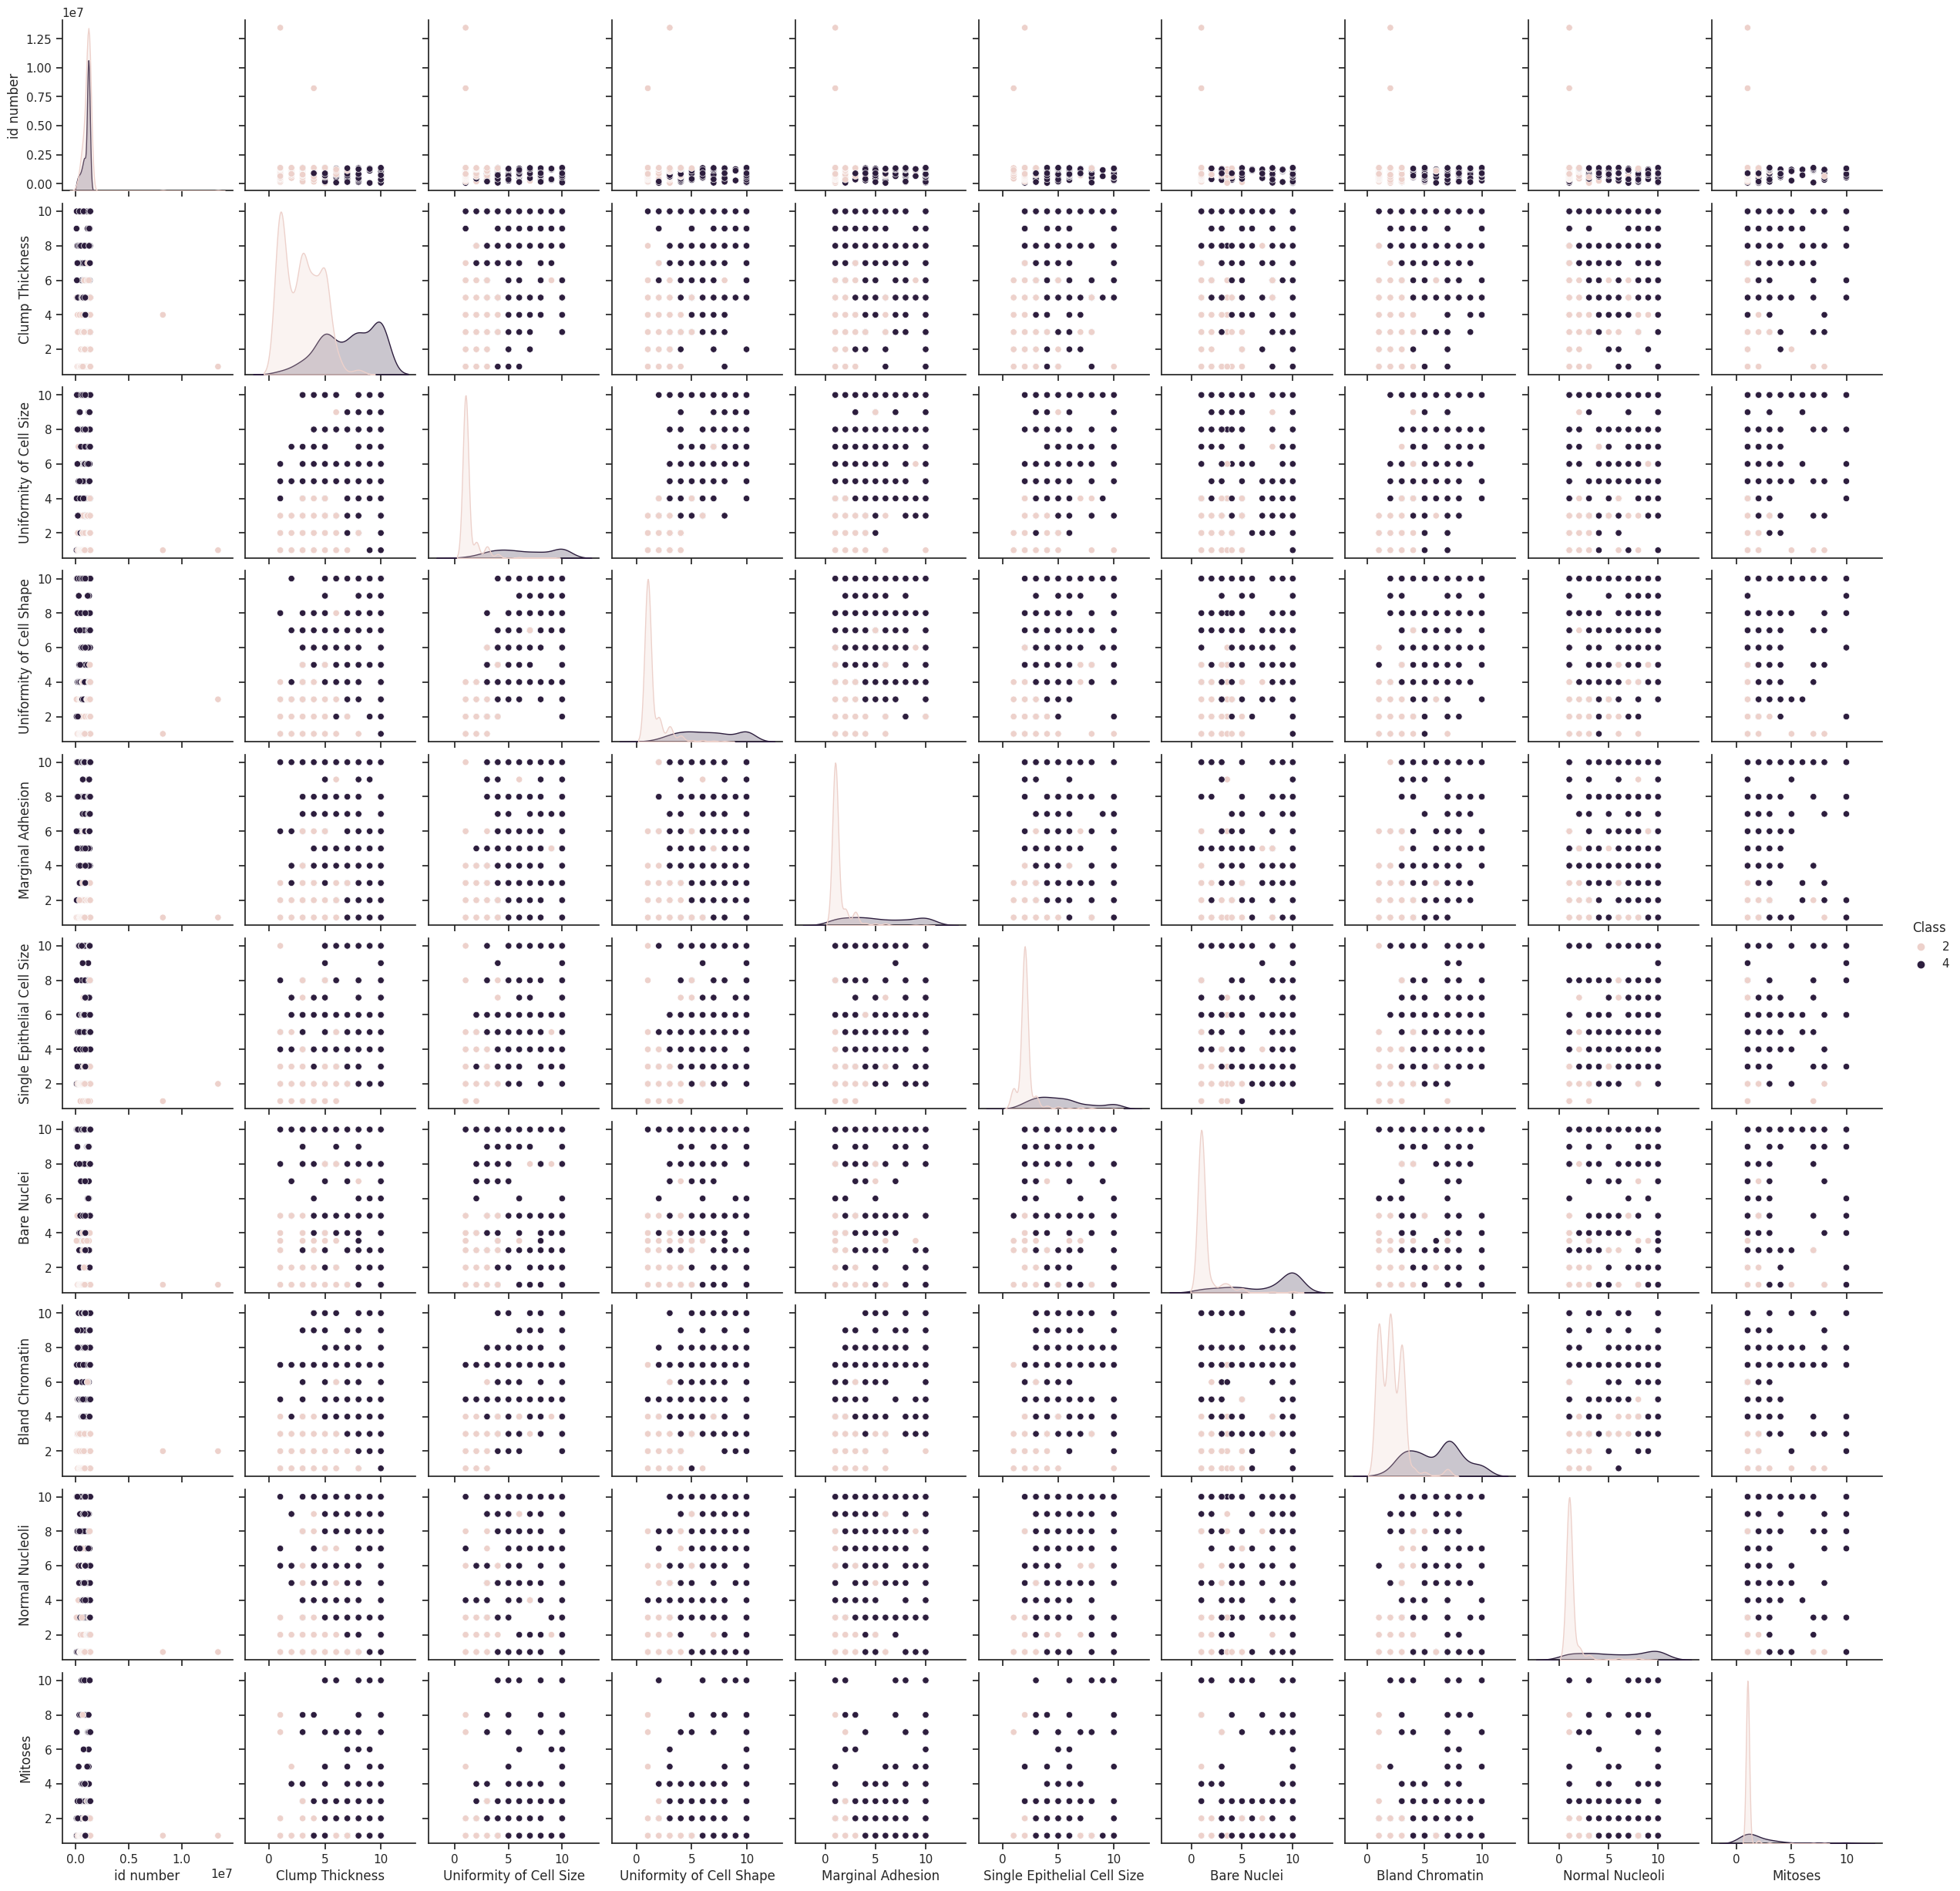

In [ ]:
# Reviamos las distribuciones y dispersiones a nivel de todo el dataset:
#sns.set_theme(style="ticks")
#sns.pairplot(dfBreastCancer, hue="Class")

In [ ]:
# Eliminamos la columna de identificación y visualizamos algunos registros del dataset:
dfBreastCancer = dfBreastCancer.drop(['id number'], axis = 1)
dfBreastCancer.tail(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4
698,4,8,8,5,4,5.0,10,4,1,4


Text(0.5, 1.0, 'Mitoses')

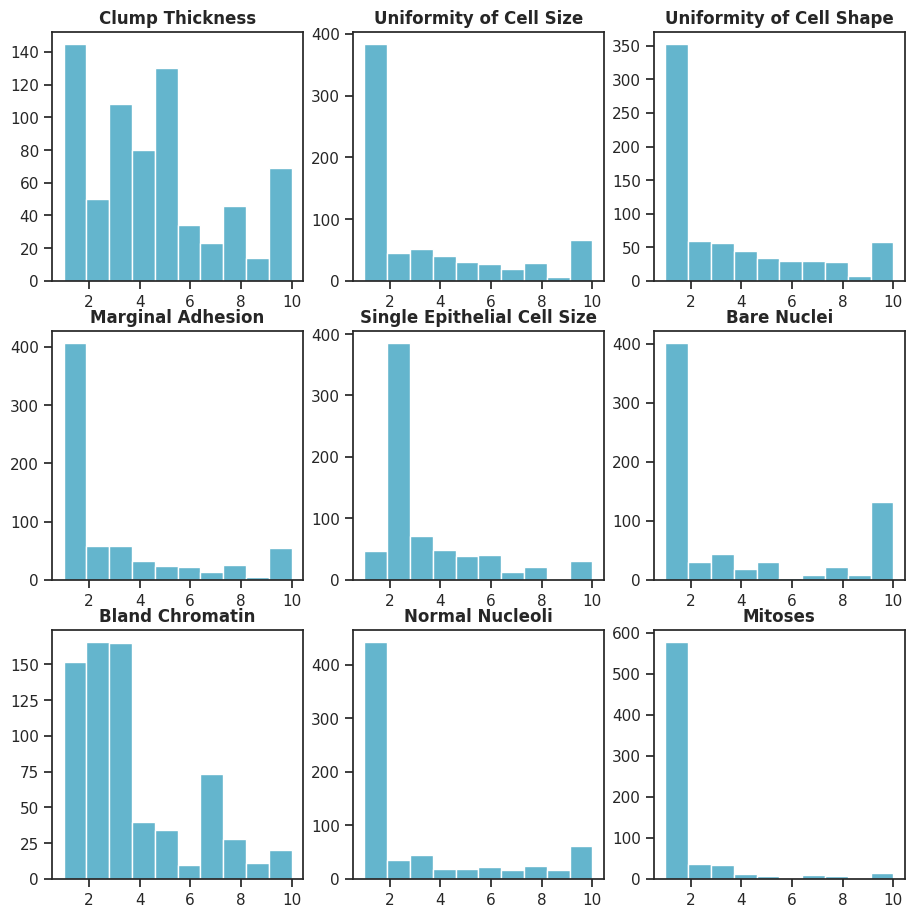

In [ ]:
# Vamos a revisar la distribución en general por columnas para ver las concentraciones a nivel general:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(11,11)
#----------------
axs[0, 0].hist(dfBreastCancer['Clump Thickness'], bins=10, color = 'c', density=False)
axs[0, 0].set_title('Clump Thickness', fontweight ="bold")
#----------------
axs[0, 1].hist(dfBreastCancer['Uniformity of Cell Size'], bins=10, color = 'c', density=False)
axs[0, 1].set_title('Uniformity of Cell Size', fontweight ="bold")
#----------------
axs[0, 2].hist(dfBreastCancer['Uniformity of Cell Shape'], bins=10, color = 'c', density=False)
axs[0, 2].set_title('Uniformity of Cell Shape', fontweight ="bold")
#----------------
axs[1, 0].hist(dfBreastCancer['Marginal Adhesion'], bins=10, color = 'c', density=False)
axs[1, 0].set_title('Marginal Adhesion', fontweight ="bold")
#----------------
axs[1, 1].hist(dfBreastCancer['Single Epithelial Cell Size'], bins=10, color = 'c', density=False)
axs[1, 1].set_title('Single Epithelial Cell Size', fontweight ="bold")
#----------------
axs[1, 2].hist(dfBreastCancer['Bare Nuclei'], bins=10, color = 'c', density=False)
axs[1, 2].set_title('Bare Nuclei', fontweight ="bold")
#----------------
axs[2, 0].hist(dfBreastCancer['Bland Chromatin'], bins=10, color = 'c', density=False)
axs[2, 0].set_title('Bland Chromatin', fontweight ="bold")
#----------------
axs[2, 1].hist(dfBreastCancer['Normal Nucleoli'], bins=10, color = 'c', density=False)
axs[2, 1].set_title('Normal Nucleoli', fontweight ="bold")
#----------------
axs[2, 2].hist(dfBreastCancer['Mitoses'], bins=10, color = 'c', density=False)
axs[2, 2].set_title('Mitoses', fontweight ="bold")

## Normalización y entrenamiento 




In [ ]:
# Creamos un objeto tipo scaler:
scaler = StandardScaler()

In [ ]:
# Generamos la partición de los datos del target y los features:
X = dfBreastCancer.drop(['Class'], axis = 1)
y = dfBreastCancer.Class

In [ ]:
# Normalizamos la data:
scaler.fit(X)
X_normalized_data = scaler.transform(X)

In [ ]:
#Visualizamos la data ya normalizada:
X_normalized_data

array([[ 0.20693572, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.2668747 , ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.74329904, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  2.28722218, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.94032386, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  1.61377302, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [ ]:
# Reemplazamos los números de las categorías para los resultados Benigno 2 por 0 y Maligno 4 por 1:
y = y.replace({2: 0, 4: 1})
y = y.values
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
# Realizamos el split para el training y testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_data, y, test_size = 0.3, random_state = 42)

In [ ]:
# Instanciamos un objeto de la clase LogisticRegression:
logistic_model = LogisticRegression()

In [ ]:
# Hacemos el entrenamiento del modelo de acuerdo al objeto instanciado:
logistic_model.fit(X_train, y_train)

LogisticRegression()

## Revisión de el rendimiento y métricas para el modelo

In [ ]:
# Revisamos ahora el score del modelo de acuerdo al entrenamiento realizado:
print("Score from the logistic regression model (training): {}%".format(round(logistic_model.score(X_train, y_train), 2) * 100))

Score from the logistic regression model (training): 97.0%


In [ ]:
# Revisamos de manera análoga el score del modelo de acuerdo a la data de testing:
print("Score from the logistic regression model (testing): {}%".format(round(logistic_model.score(X_test, y_test), 2) * 100))

Score from the logistic regression model (testing): 96.0%


In [ ]:
# Traemos el coeficiente asociado a la variable Class y por ende a la ecuación de la regresión logística:
print(logistic_model.coef_)

[[1.27416289 0.12847943 0.97797868 0.44215633 0.14929367 1.45520729
  0.89543463 0.14044064 0.61436541]]


In [ ]:
# Vemos el resultado de las predicciones:
predictions = logistic_model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Número de casos cuya predicción es negativa y positiva respectivamente:
print("Total casos negativos predecidos: {}".format((predictions == 0).sum()))
print("Total casos positivos predecidos: {}".format((predictions == 1).sum()))

Total casos negativos predecidos: 147
Total casos positivos predecidos: 63


In [ ]:
# Generamos la matriz:
conf_matrix = confusion_matrix(y_test, predictions)

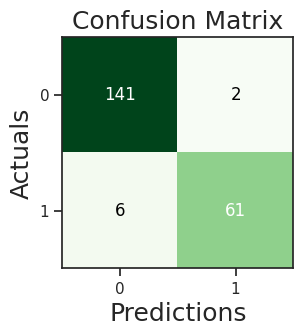

In [ ]:
# Graficamos la matriz de confusión para una mejor visualización:

%matplotlib inline
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb_classifier.classes_)
#disp.plot()
#plt.show()
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
# Revisamos las métricas de rendimiento:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



In [ ]:
# Obtener las probabilidades de predicción para los datos de prueba
proba = logistic_model.predict_proba(X_test)
proba

array([[9.92529003e-01, 7.47099703e-03],
       [9.89937454e-01, 1.00625463e-02],
       [9.90753029e-01, 9.24697060e-03],
       [9.99022362e-02, 9.00097764e-01],
       [9.74552237e-01, 2.54477633e-02],
       [9.96241036e-01, 3.75896361e-03],
       [9.81348462e-01, 1.86515385e-02],
       [7.10934026e-03, 9.92890660e-01],
       [1.06436118e-02, 9.89356388e-01],
       [7.92577502e-01, 2.07422498e-01],
       [9.94100716e-01, 5.89928351e-03],
       [3.36299062e-01, 6.63700938e-01],
       [9.93578490e-01, 6.42150950e-03],
       [9.79478713e-01, 2.05212865e-02],
       [9.93578490e-01, 6.42150950e-03],
       [8.03030813e-04, 9.99196969e-01],
       [9.98193989e-01, 1.80601106e-03],
       [8.05911952e-04, 9.99194088e-01],
       [4.40380054e-02, 9.55961995e-01],
       [1.86062829e-01, 8.13937171e-01],
       [1.54417939e-05, 9.99984558e-01],
       [9.97563631e-01, 2.43636856e-03],
       [4.15020857e-01, 5.84979143e-01],
       [9.98193989e-01, 1.80601106e-03],
       [1.345486

In [ ]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, proba[:,1], pos_label=1)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_test, proba[:,1])
print(auc_score1)

0.9975994155098633


<ipython-input-43-43ac5f27d8ad>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


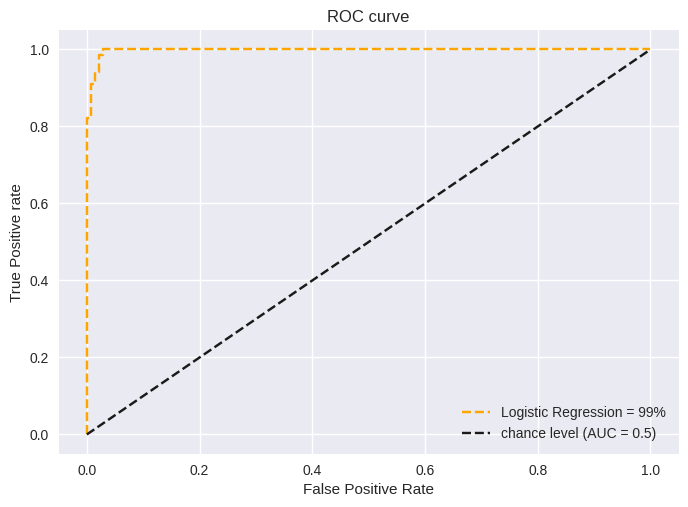

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression = 99%')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

plt.show()